In [31]:
import os
import random
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
import kaggle

In [32]:
# kaggle.api.authenticate()
# kaggle.api.dataset_download_files('omkargurav/face-mask-dataset',unzip=True)

In [33]:
import tensorflow as tf
print("GPUs Available:", tf.config.list_physical_devices('GPU'))

GPUs Available: []


20 images loaded.


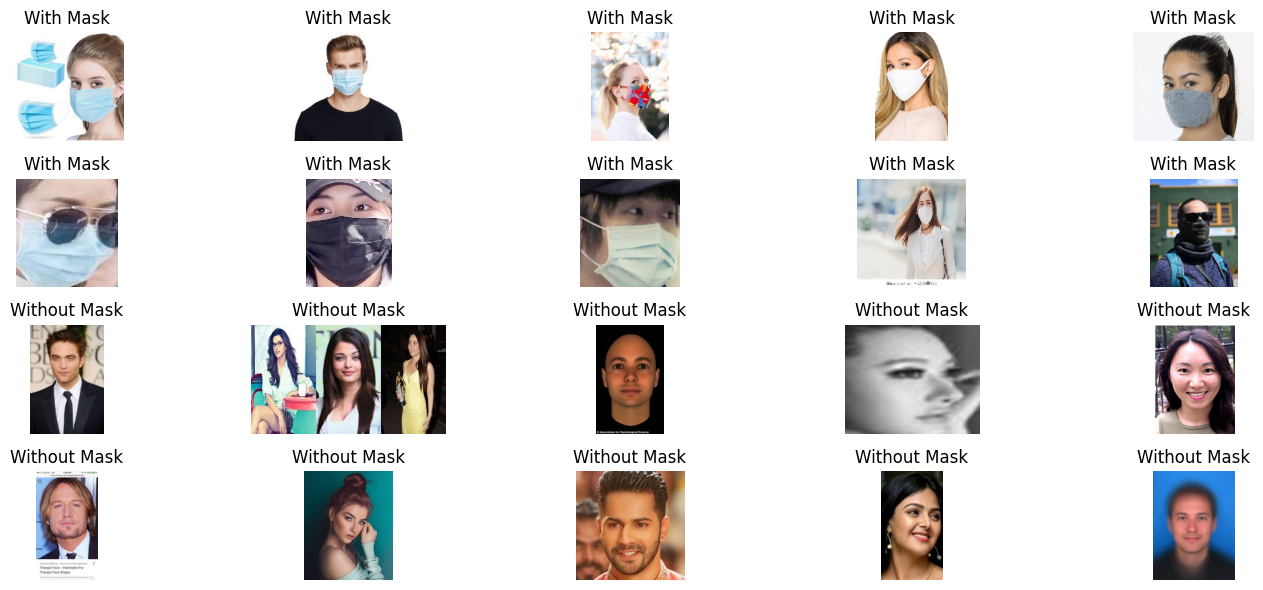

In [ ]:
def load_random_images_cv2(base_path, n=10):
    classes = {
        "with_mask": 1,
        "without_mask": 0
    }

    images = []
    labels = []
    filenames = []

    for class_name, label in classes.items():
        folder = os.path.join(base_path, class_name)
        all_imgs = os.listdir(folder)

        selected = random.sample(all_imgs, n)

        for img_name in selected:
            img_path = os.path.join(folder, img_name)

            img = cv2.imread(img_path)

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            images.append(img)
            labels.append(label)
            filenames.append(img_name)

    return images, labels, filenames


base_path = "data"
images, labels, filenames = load_random_images_cv2(base_path)

print(len(images), "images loaded.")

plt.figure(figsize=(15, 6))

for i in range(len(images)):
    plt.subplot(4, 5, i + 1)  # 4x5 grid for 20 images
    plt.imshow(images[i])
    title = "With Mask" if labels[i] == 1 else "Without Mask"
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [35]:
# Read The Image From File 
# Function That extracts faces (yolo) and send to classifer and returns a annoted frame
# Function that classify and returns only labels (mask and not mask using cnn)

In [48]:
import detect
image_path = r"test.png"

img = cv2.imread(image_path)
annotated = detect.detect_and_annotate(img)

cv2.namedWindow("Result", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Result", 1000, 800)
cv2.imshow("Result", annotated)

cv2.waitKey(0)
cv2.destroyAllWindows()


0: 448x640 6 faces, 63.2ms
Speed: 2.5ms preprocess, 63.2ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
